# Predicting Car Prices with Linear Regression Models

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [182]:
df = pd.read_csv('./used_cars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [183]:
df.loc[(df.brand =='Nissan') ,['brand','engine','model']]

,brand,engine,model
18,Nissan,287.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,350Z Enthusiast
26,Nissan,1.8 Liter,Sentra SR
56,Nissan,1.5L I3 12V GDI DOHC Turbo,Rogue SV
119,Nissan,485.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,GT-R Premium
141,Nissan,400.0HP 5.6L 8 Cylinder Engine Gasoline Fuel,Armada SL
...,...,...,...
3905,Nissan,545.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,GT-R Premium
3940,Nissan,188.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Juke SL
3946,Nissan,170.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,Rogue SL
3950,Nissan,182.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,Altima 2.5 S


In [184]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [185]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [186]:
#milage and price is converted string to float.
df['milage'] = df['milage'].str.replace(r'[^0-9]', '', regex=True).astype(float)
df['price'] = df['price'].str.replace(r'[^0-9]', '', regex=True).astype(float)

In [187]:
df.loc[:,['milage','price']].head(3)

,milage,price
0,51000.0,10300.0
1,34742.0,38005.0
2,22372.0,54598.0


In [188]:
df.price.min()

2000.0

In [189]:
df.describe()

,model_year,milage,price
count,4009.000000,4009.000000,4.009000e+03
mean,2015.515590,64717.551010,4.455319e+04
std,6.104816,52296.599459,7.871064e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,23044.000000,1.720000e+04
50%,2017.000000,52775.000000,3.100000e+04
75%,2020.000000,94100.000000,4.999000e+04
max,2024.000000,405000.000000,2.954083e+06


## Checking missing values

In [190]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [191]:
df.clean_title.unique()

array(['Yes', nan], dtype=object)

In [192]:
# data only has yes value so nan values should be replace with No.
df.clean_title.fillna('No',inplace=True)
df['clean_title'].unique()

array(['Yes', 'No'], dtype=object)

Text(0, 0.5, 'Clean Title')

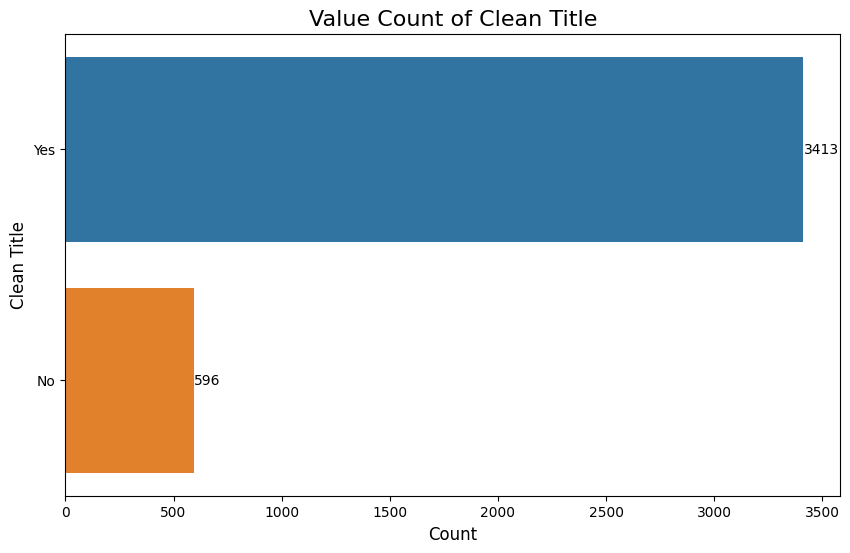

In [226]:
plt.figure(figsize=(10, 6))

# Create horizontal bar chart
sns.barplot(x=df['clean_title'].value_counts().values,
            y=df['clean_title'].value_counts().index,
            hue=df['clean_title'].value_counts().index)

# Add labels for each bar
for index, value in enumerate(df['clean_title'].value_counts().values):
    plt.text(value, index, f'{value}', va='center', fontsize=10)

# Titles and labels
plt.title('Value Count of Clean Title', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Clean Title', fontsize=12)

### Extracting Horsepower , Liters_engine ,Cylinders_count from engine

In [194]:
df['Horsepower'] = df['engine'].str.extract(r'(\d+\.\d*|\d+)HP', expand=False).astype(float)
# Match engine size represented as either 'L' or 'liter' or 'Liter'
df['Liters_engine'] = df['engine'].str.extract(r'(\d+\.\d*|\d+)\s*(?:L|liter|Liter)', expand=False).astype(float)

df['Cylinders_count'] = df['engine'].str.extract(r'(\d+)\s+Cylinder', expand=False).astype(float)

In [195]:
df.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Liters_engine,Cylinders_count
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.0,3.7,6.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,NaN,3.8,NaN
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,54598.0,NaN,3.5,NaN


In [196]:
# deriving car's age from model_year
from datetime import datetime
current_year=datetime.now().year
df['model_age']=current_year-df['model_year']

In [197]:
# dropping useless features
df.drop(['model_year','engine'],axis=1,inplace=True)

In [198]:
df.head(3)

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Liters_engine,Cylinders_count,model_age
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.0,3.7,6.0,12
1,Hyundai,Palisade SEL,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,NaN,3.8,NaN,4
2,Lexus,RX 350 RX 350,22372.0,Gasoline,Automatic,Blue,Black,None reported,No,54598.0,NaN,3.5,NaN,3


In [203]:
df.describe()

,milage,price,Horsepower,Liters_engine,Cylinders_count,model_age
count,4009.000000,4.009000e+03,3201.000000,3792.000000,3064.000000,4009.000000
mean,64717.551010,4.455319e+04,332.206498,3.684454,6.258159,9.484410
std,52296.599459,7.871064e+04,122.258492,1.417481,1.677256,6.104816
min,100.000000,2.000000e+03,70.000000,0.650000,3.000000,1.000000
25%,23044.000000,1.720000e+04,248.000000,2.500000,5.000000,5.000000
50%,52775.000000,3.100000e+04,310.000000,3.500000,6.000000,8.000000
75%,94100.000000,4.999000e+04,400.000000,4.700000,8.000000,13.000000
max,405000.000000,2.954083e+06,1020.000000,8.400000,12.000000,51.000000


In [200]:
df.isnull().sum()

brand                0
model                0
milage               0
fuel_type          170
transmission         0
ext_col              0
int_col              0
accident           113
clean_title          0
price                0
Horsepower         808
Liters_engine      217
Cylinders_count    945
model_age            0
dtype: int64

In [210]:
df.Horsepower.fillna(df.Horsepower.median(),inplace=True)

In [211]:
df.Liters_engine.fillna(df.Liters_engine.median(),inplace=True)

In [212]:
df.Cylinders_count.fillna(df.Cylinders_count.median(),inplace=True)

In [217]:
def transmission_category(transmission):
    transmission = transmission.strip().lower()  # Convert to lowercase for easier matching
    if any(keyword in transmission for keyword in ['automatic', 'a/t']):
        return 1
    elif any(keyword in transmission for keyword in ['manual', 'm/t']):
        return 2
    elif any(keyword in transmission for keyword in ['cvt']):
        return 3
    else:
        return 4

df['transmission']=df['transmission'].apply(transmission_category)


print(df['transmission'].value_counts())

transmission
1    3148
4     426
2     372
3      63
Name: count, dtype: int64


In [218]:
df['accident'].fillna('None reported',inplace=True)

Text(0, 0.5, 'Accident')

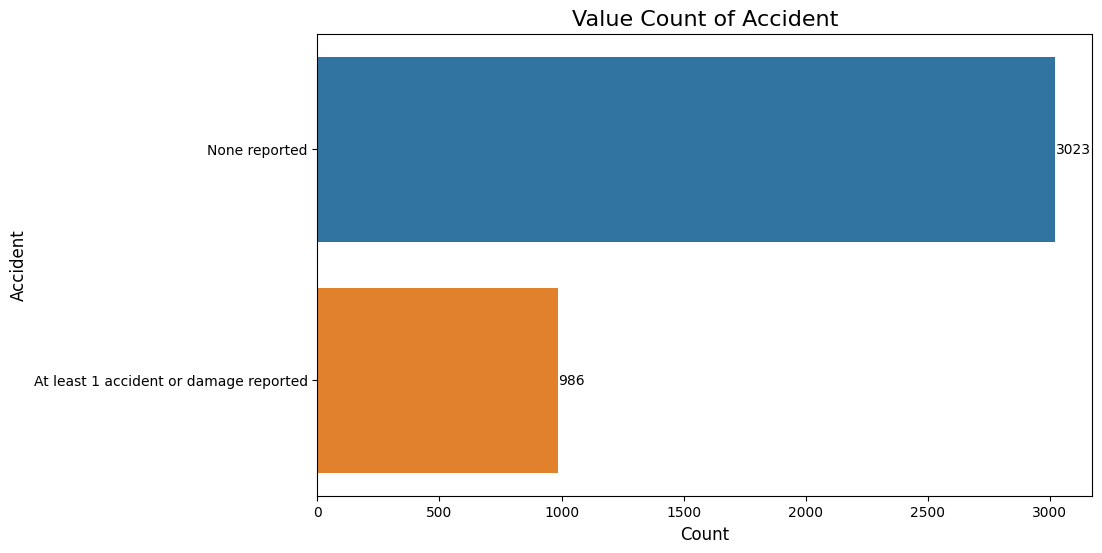

In [223]:
plt.figure(figsize=(10, 6))

# Create horizontal bar chart
sns.barplot(x=df['accident'].value_counts().values,
            y=df['accident'].value_counts().index,
            hue=df['accident'].value_counts().index)

# Add labels for each bar
for index, value in enumerate(df['accident'].value_counts().values):
    plt.text(value, index, f'{value}', va='center', fontsize=10)

# Titles and labels
plt.title('Value Count of Accident', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Accident', fontsize=12)

In [229]:
#Encoding Accident and Clean Title
def mapping_columns(df):
    df['accident']=df['accident'].replace({
        'At least 1 accident or damage reported': 1,
        'None reported': 0
    })
    df["clean_title"] = df["clean_title"].replace({
        "Yes": 1,
        "No": 0
    })
    return df

In [231]:
df= mapping_columns(df)

In [233]:
df['fuel_type'].nunique(),df['ext_col'].nunique(),df['int_col'].nunique(),df['model'].nunique()

(7, 319, 156, 1898)

## using 2 approaches-
* dropping model feature

In [234]:
df.drop('model',axis=1,inplace=True)

In [235]:
df.head(3)

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Liters_engine,Cylinders_count,model_age
0,Ford,51000.0,E85 Flex Fuel,1,Black,Black,1,1,10300.0,300.0,3.7,6.0,12
1,Hyundai,34742.0,Gasoline,1,Moonlight Cloud,Gray,1,1,38005.0,310.0,3.8,6.0,4
2,Lexus,22372.0,Gasoline,1,Blue,Black,0,0,54598.0,310.0,3.5,6.0,3


## using label encoder for brand, fuel_type,ext_col,int_col.

In [244]:
from sklearn.preprocessing import LabelEncoder
cat_col=['brand','fuel_type','int_col','ext_col']
lb=LabelEncoder()

for col in cat_col:
  df[col]=lb.fit_transform(df[col])

In [245]:
df.head()

,brand,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Liters_engine,Cylinders_count,model_age
0,14,51000.0,1,1,29,14,1,1,10300.0,300.0,3.7,6.0,12
1,19,34742.0,2,1,185,71,1,1,38005.0,310.0,3.8,6.0,4
2,27,22372.0,2,1,38,14,0,0,54598.0,310.0,3.5,6.0,3
3,20,88900.0,3,1,29,14,0,1,15500.0,354.0,3.5,6.0,10
4,3,9835.0,2,1,120,14,0,0,34999.0,310.0,2.0,6.0,4


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            4009 non-null   int64  
 1   milage           4009 non-null   float64
 2   fuel_type        4009 non-null   int64  
 3   transmission     4009 non-null   int64  
 4   ext_col          4009 non-null   int64  
 5   int_col          4009 non-null   int64  
 6   accident         4009 non-null   int64  
 7   clean_title      4009 non-null   int64  
 8   price            4009 non-null   float64
 9   Horsepower       4009 non-null   float64
 10  Liters_engine    4009 non-null   float64
 11  Cylinders_count  4009 non-null   float64
 12  model_age        4009 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 407.3 KB


In [247]:
df.isnull().sum()

brand              0
milage             0
fuel_type          0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title        0
price              0
Horsepower         0
Liters_engine      0
Cylinders_count    0
model_age          0
dtype: int64

## Correlation Matrix

Text(0.5, 1.0, 'Correlation Heatmap')

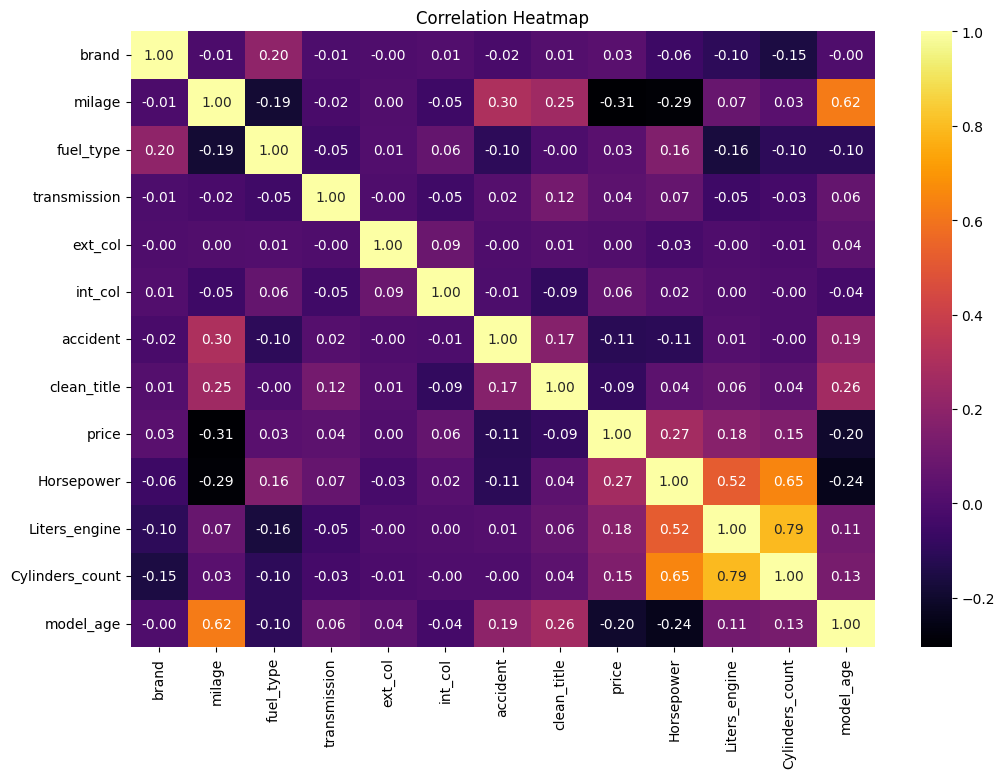

In [249]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,cmap='inferno',fmt='.2f')
plt.title('Correlation Heatmap')    

## Checking the Price (Target variable)

Text(0.5, 0, 'Price')

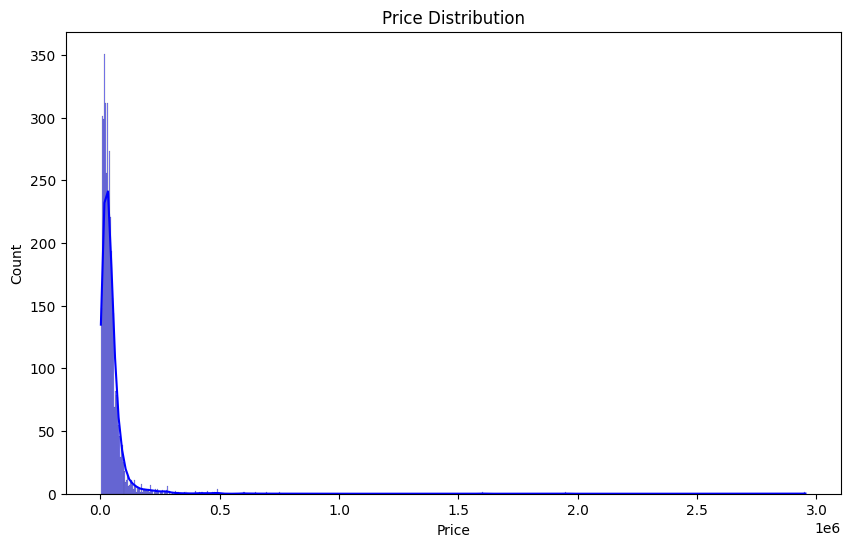

In [251]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')

## Applying log transformation to transform the price feature

In [280]:
df['price']=np.log1p(df['price'])

Text(0.5, 0, 'Price')

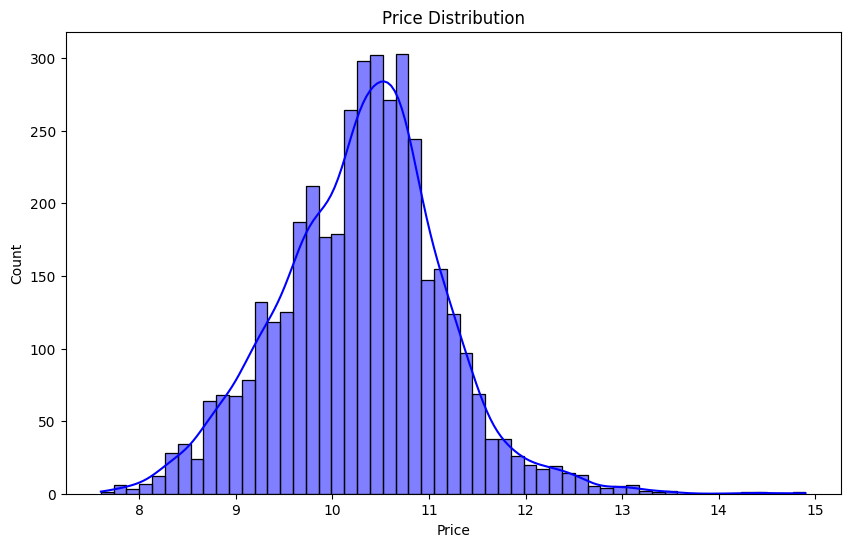

In [282]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],kde=True,color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')

In [283]:
X = df.drop(columns='price')
y= df.price

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [317]:
model = LinearRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

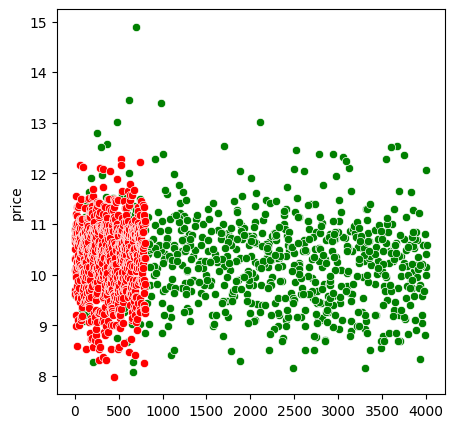

In [318]:
plt.figure(figsize=(5,5))
sns.scatterplot(y_test,color='g')
sns.scatterplot(y_hat,color='r')
plt.show()

# model Evaluation(metrics)

In [319]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [320]:
mse = mean_squared_error(y_test,y_hat)
mse

0.22185115481997675

In [321]:
mae = mean_absolute_error(y_test,y_hat)
mae

0.32782517233264574

In [322]:
rmse = mse ** 0.5
rmse

0.4710107799403075

In [323]:
r2 = r2_score(y_test,y_hat)
r2

0.6953457809695738